# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>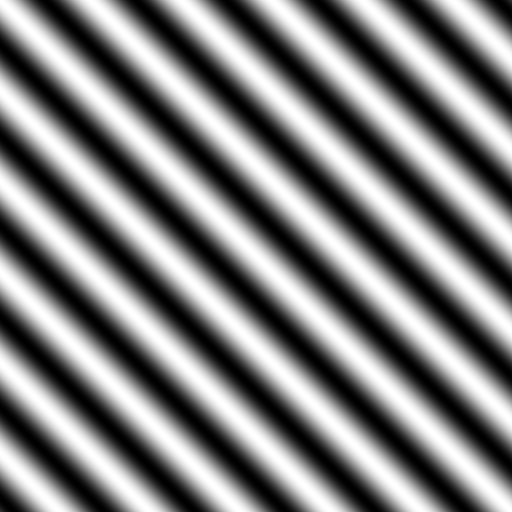</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
#%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    
def computeFT(I):
    """ Array -> Array[complex] """
    return np.fft.fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    #we use log10 and not ln
    return np.log10(1 + np.abs(fftshift(If)))

def blend(I1,I2,alpha):
    return I1*alpha + I2*(1-alpha)
    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.


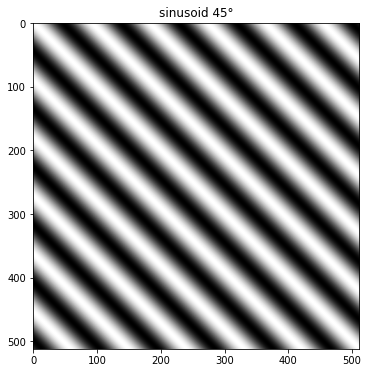

In [2]:
sinArr = sinusoid2d(1,45,512,64,1)
imshow(sinArr,"sinusoid 45°")

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

we take u the vertical and t the horizontal :

- $f_u^{\text{max}} = f_0 * cos(\theta)$ 
- $f_t^{\text{max}} = f_0 * sin(\theta)$

you will find bellow a generic function to handle all the cases :

In [3]:
def findMaxF(theta, sampleRate):
    #we know that T0 = 1/F0 so 
    #F0 = 1 / TO thus we can direcly divide Fm by the sampleRate
    return max(np.sin(np.deg2rad(theta)),np.cos(np.deg2rad(theta)))/sampleRate

2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

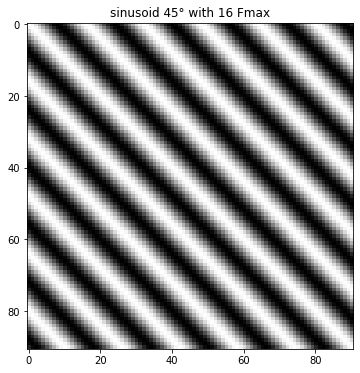

In [4]:
fm16 = sinusoid2d(1,45,512,64,1/(16*findMaxF(45,64)))
imshow(fm16,"sinusoid 45° with 16 Fmax")

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

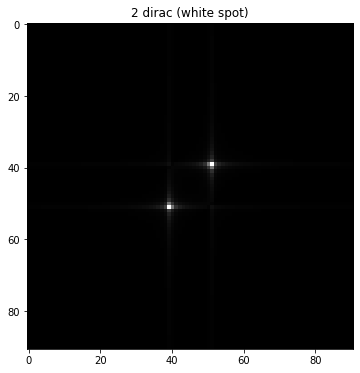

In [5]:
fm16TF = computeFT(fm16)
imshow(toVisualizeFT(fm16TF),"2 dirac (white spot)")

2. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

if we remmenbre Nyquist-Shannon theorem, the minimum $f_{s}$ = $2f_{max}$ thus we can look for the dirac peaks at this level

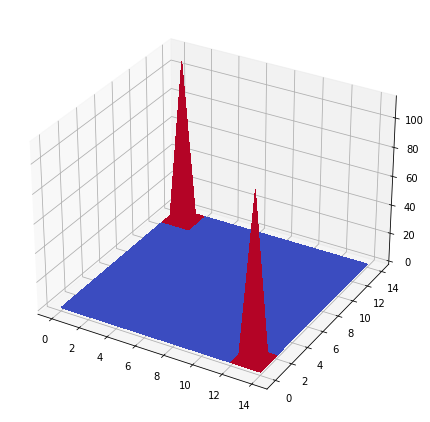

In [6]:
#we use a slithy bigger value of Te be 2Fmax is the smallest value possible
fm2 = sinusoid2d(1,45,512,64,1/(2.5*findMaxF(45,64)))
fm2TF = computeFT(fm2)
surf(toVisualizeFT(fm2TF))

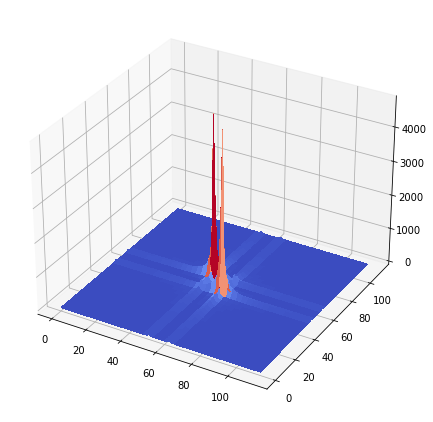

In [7]:
fm20 = sinusoid2d(1,45,512,64,1/(20*findMaxF(45,64)))
fm20TF = computeFT(fm20)
surf(toVisualizeFT(fm20TF))

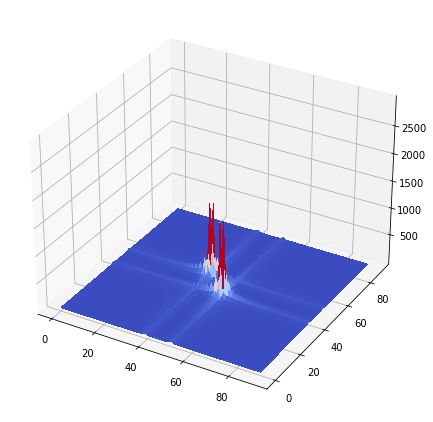

In [8]:
fm = sinusoid2d(1,45,512,64,1/(16*findMaxF(45,64)))
fmTF = computeFT(fm)
surf(toVisualizeFT(fmTF))

the larger the $T_e$ the smaller the dirac picks are

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

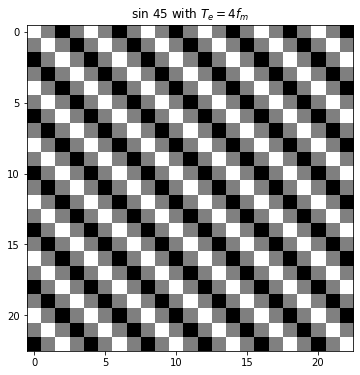

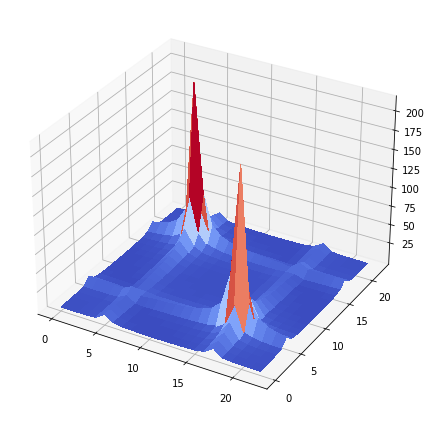

In [9]:
fm4 = sinusoid2d(1,45,512,64,1/(4*findMaxF(45,64)))
imshow(fm4, "sin 45 with $T_e = 4f_m$")
z4 = computeFT(fm4)
surf(toVisualizeFT(z4))

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [10]:
def error(xr,xd,A,L):
    count = 0
    for k in range(0,L):
        for l in range(0,L):
            count += np.abs(xr[k][l] - xd[k][l])
    
    return count/(2*A*L**2)

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

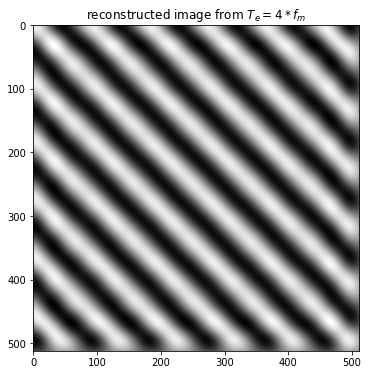

error : 0.02293692436310261


In [11]:
reFm4 = shannonInterpolation(fm4, 1/(4*findMaxF(45,64)), 512)
imshow(reFm4, "reconstructed image from $T_e = 4*f_m$")

err = error(reFm4,sinArr,1,512)
print("error :", err)

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

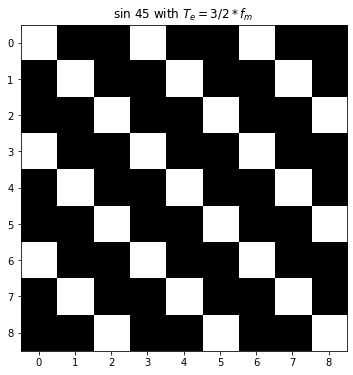

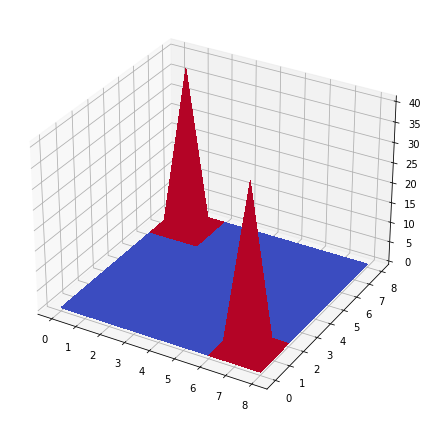

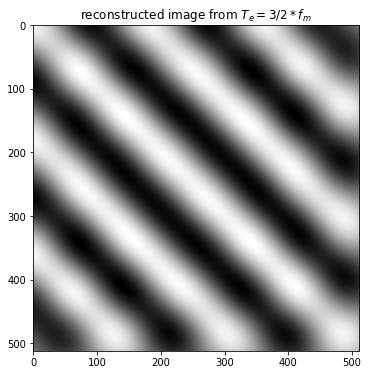

error : 0.40686264750146783


In [12]:
fe = 3/2*findMaxF(45,64)

#sample the signal
fm3_2 = sinusoid2d(1,45,512,64,1/fe)
imshow(fm3_2, "sin 45 with $T_e = 3/2*f_m$")

#compute TF and visualize it
z3_2 = computeFT(fm3_2)
surf(toVisualizeFT(z3_2))

#reconstruct the image
reFm3_2 = shannonInterpolation(fm3_2, 1/fe, 512)
imshow(reFm3_2, "reconstructed image from $T_e = 3/2*f_m$")

#print the image
err = error(reFm3_2,sinArr,1,512)
print("error :", err)

*angry Nyquist-Shannon noise*

since we sample the signal at a rate lower than $2f_{max}$ the final sinal overlap and is poorly sample, 
ench the big error and the bad reconstruction of the image.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

Fm =  0.01538762114081575


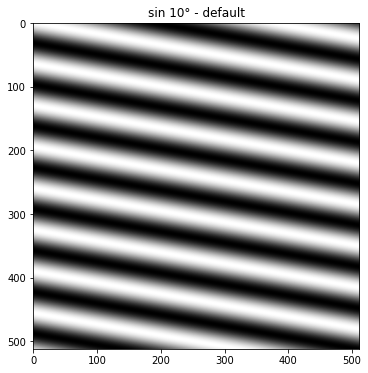

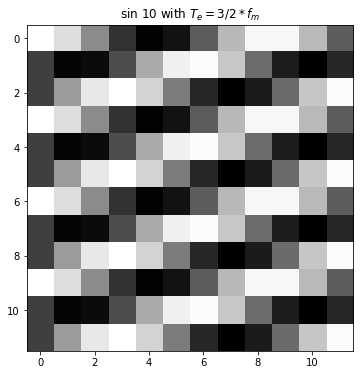

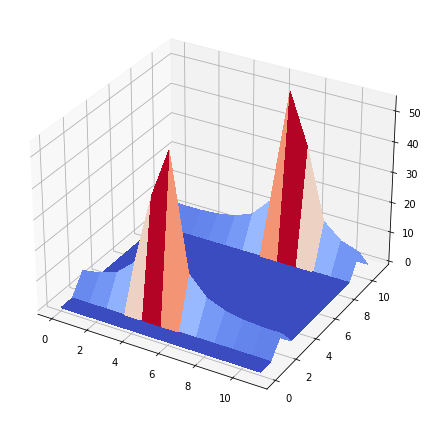

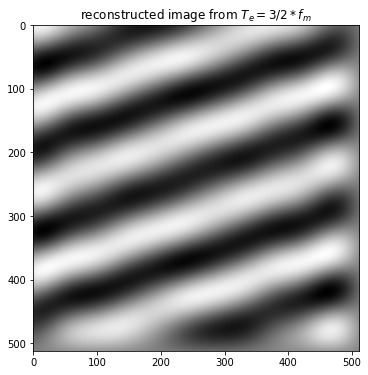

error : 0.3982390747439338


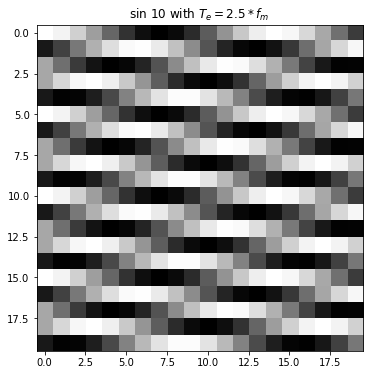

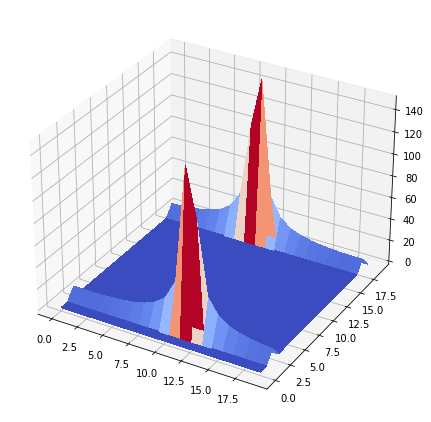

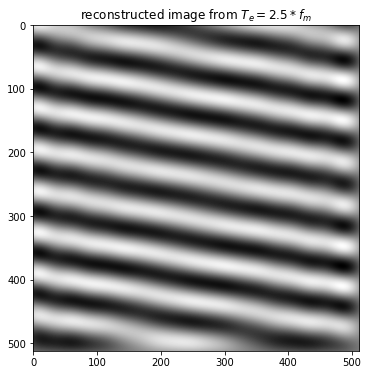

error : 0.040241398533679494


In [16]:
fm = findMaxF(10,64)
print("Fm = ", fm)

fe = 3/2*fm

#default 10° signal
sin10 = sinusoid2d(1,10,512,64,1)

imshow(sin10,"sin 10° - default")

#sample the signal
fm3_2_10 = sinusoid2d(1,10,512,64,1/fe)
imshow(fm3_2_10, "sin 10 with $T_e = 3/2*f_m$")

#compute TF and visualize it
z3_2_10 = computeFT(fm3_2_10)
surf(toVisualizeFT(z3_2_10))

#reconstruct the image
reFm3_2_10 = shannonInterpolation(fm3_2_10, 1/fe, 512)
imshow(reFm3_2_10, "reconstructed image from $T_e = 3/2*f_m$")

#print the image
err = error(reFm3_2_10,sin10,1,512)
print("error :", err)

fe = 2.5*fm

#sample the signal
fm3_2_10 = sinusoid2d(1,10,512,64,1/fe)
imshow(fm3_2_10, "sin 10 with $T_e = 2.5*f_m$")

#compute TF and visualize it
z3_2_10 = computeFT(fm3_2_10)
surf(toVisualizeFT(z3_2_10))

#reconstruct the image
reFm3_2_10 = shannonInterpolation(fm3_2_10, 1/fe, 512)
imshow(reFm3_2_10, "reconstructed image from $T_e = 2.5*f_m$")

#print the image
err = error(reFm3_2_10,sin10,1,512)
print("error :", err)

since we are under $2f_{max}$ the sampled signal is really really bad, even for us humain. It's show that when $Nyquist-Shannon$ theorm is not respect the signal can be badly interpreted and as shown changing the direction of the sample signal. 

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [14]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def sinc(x):
    return np.sin(np.pi*x)/np.sin(np.pi*x)

def shannonInterpolationLoop(I, Te, size):
    pass


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [22]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))
print(barbara.shape)

#I added a factor parameter for easier sub sampling
def subSample(I, factor=2):
    """ Array -> Array """
    return I[::factor,::factor]

(512, 512)


1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

subsampling is taking a $f_s$, and applying it a samling will respecting the Nyquist-Shannon theorem. 
So a subSampling of a factor 2 it's like doing $2f_s$

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

if we compare the factor 1 image to the factor 4 image, yes the picture is still reconisable but the data lost on
the scarf and the pants are clearly visible. the data lost also cause so moiré pattern to show up in the picture.

this is also due to 𝑁𝑦𝑞𝑢𝑖𝑠𝑡−𝑆ℎ𝑎𝑛𝑛𝑜𝑛 theorem, because there is some many frequency inside the image at a moment we will definilty be under $2f_{max}$ for one of the frequency and thus messing up the sampling.


a good solution would have been to use a low-pass or Spatial anti-aliasing filter

or anothe one could have been to do localise sub sampling, with some area of the picture being sub sample to a rate bigger than the other.


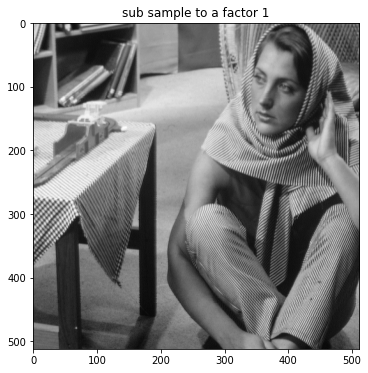

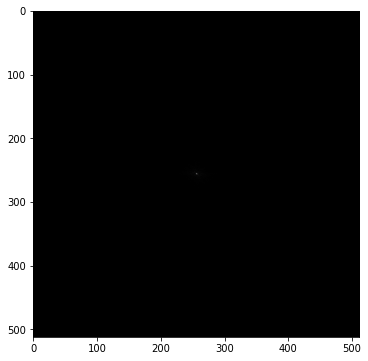

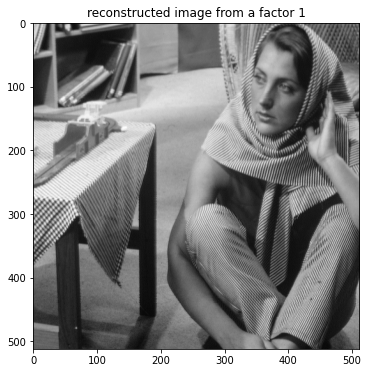

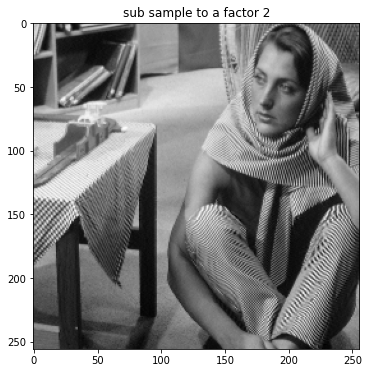

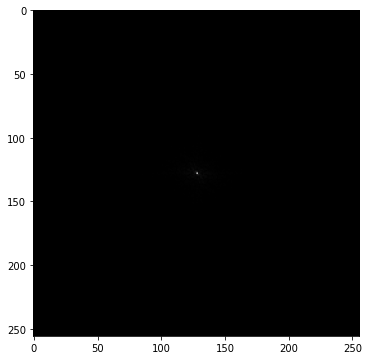

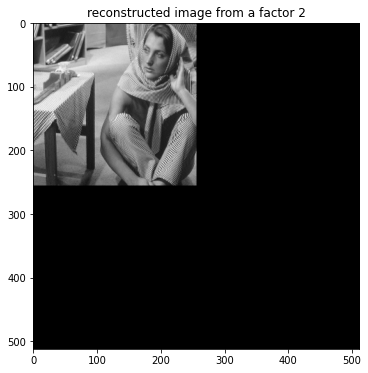

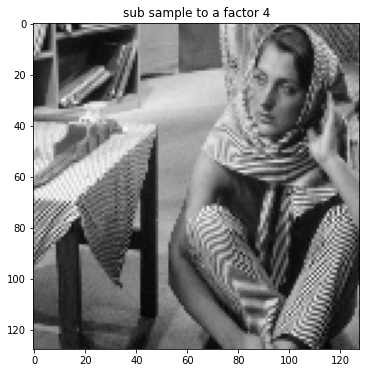

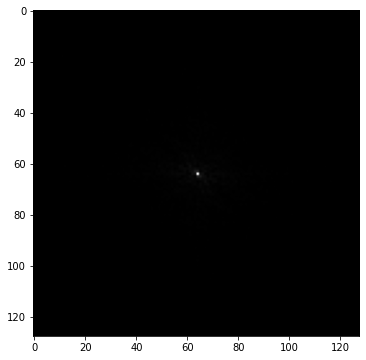

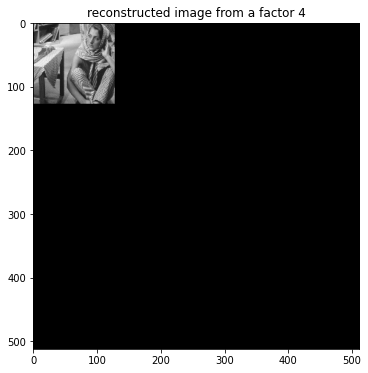

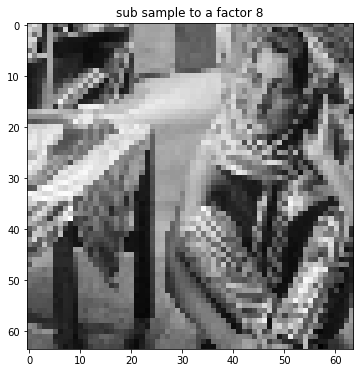

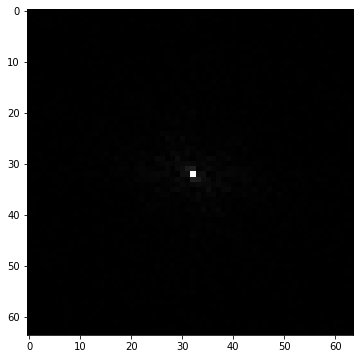

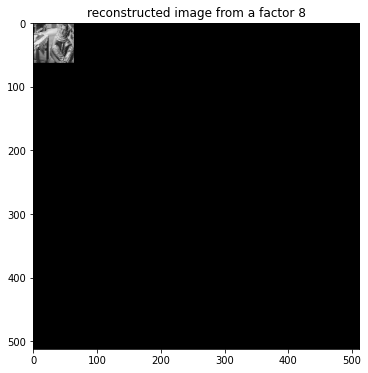

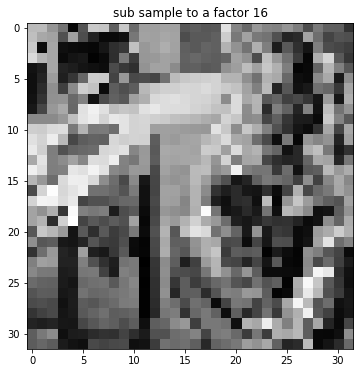

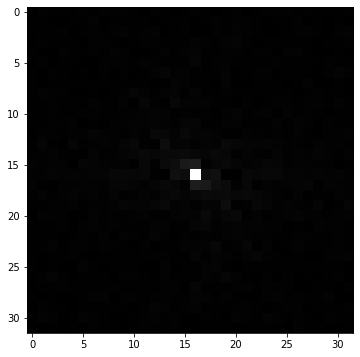

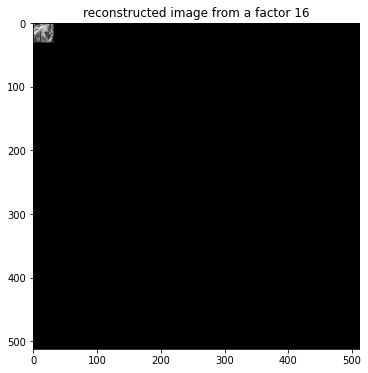

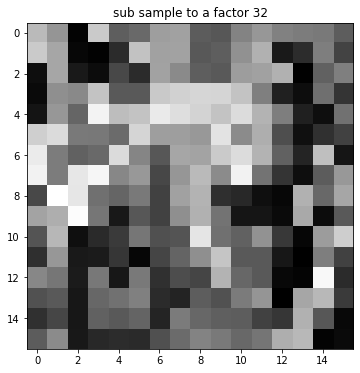

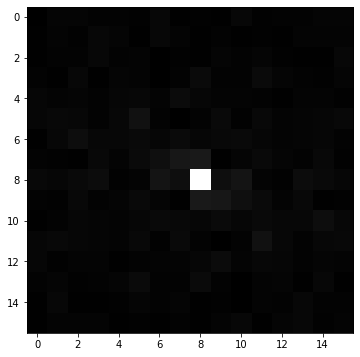

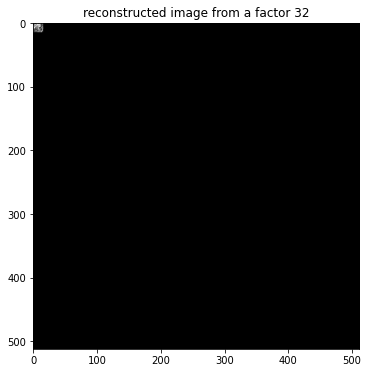

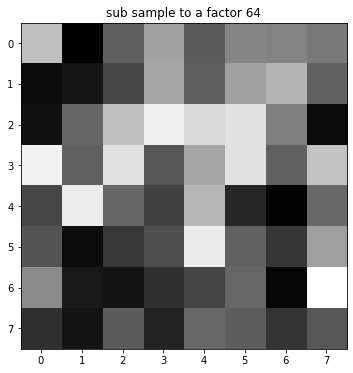

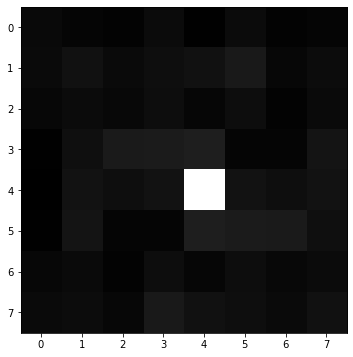

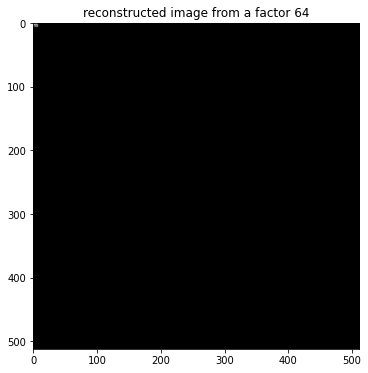

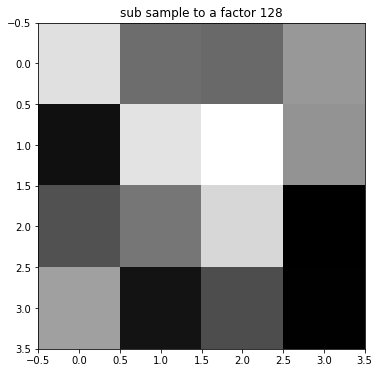

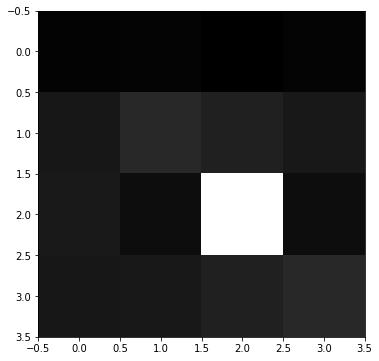

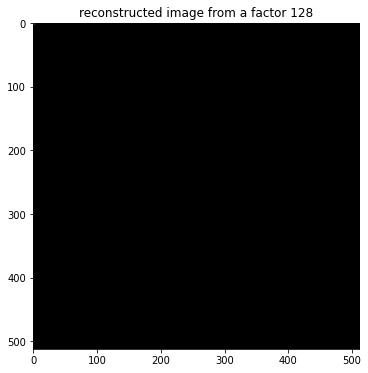

In [28]:
for x in range(0, 8):
    sub = 2**x;
    img = subSample(barbara,sub)
    imshow(img, f"sub sample to a factor {sub}")
    imshow(toVisualizeFT(computeFT(img)))
    
    #uncomment to see the image reconstruction
    #reFm3_2_10 = shannonInterpolation(img, sub, 512)
    #imshow(reFm3_2_10, f"reconstructed image from a factor {sub}")

3. Bonus question: same question with the image `img/mandrill.png`.

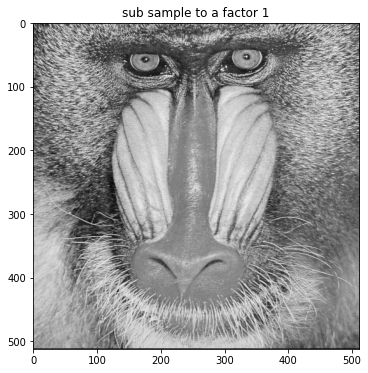

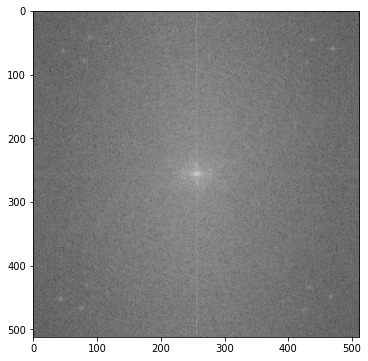

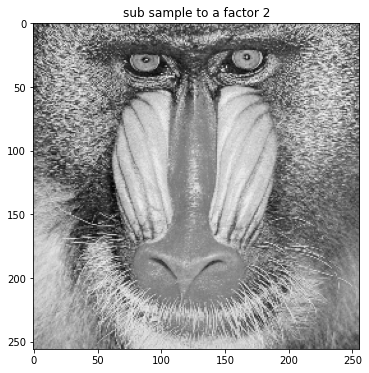

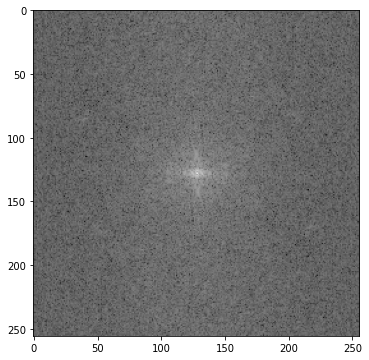

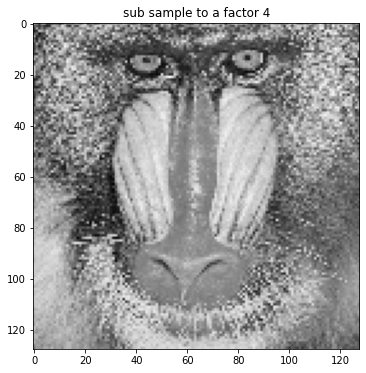

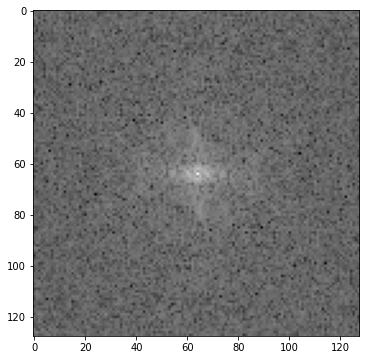

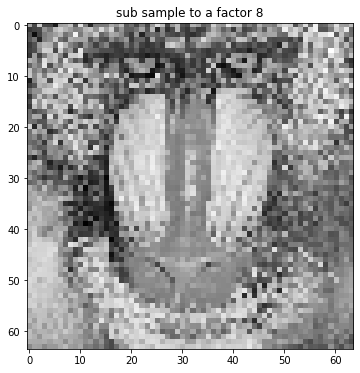

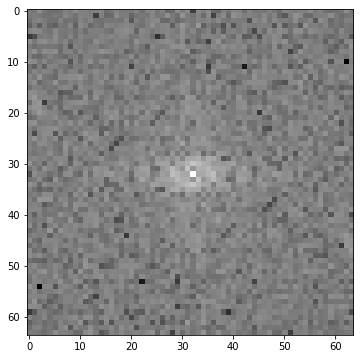

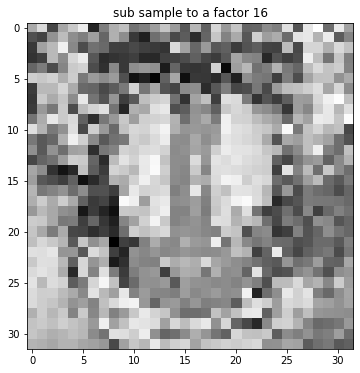

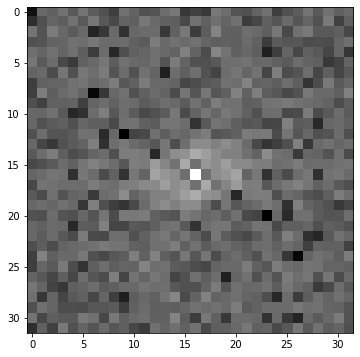

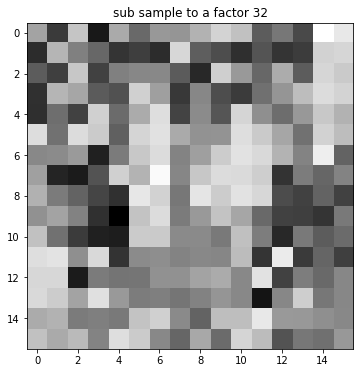

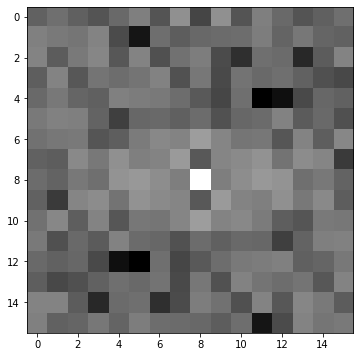

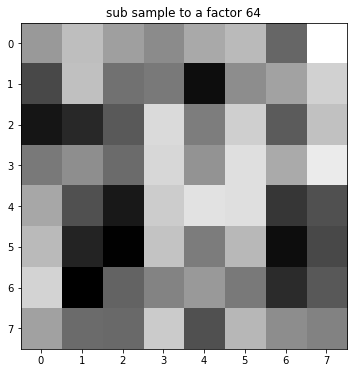

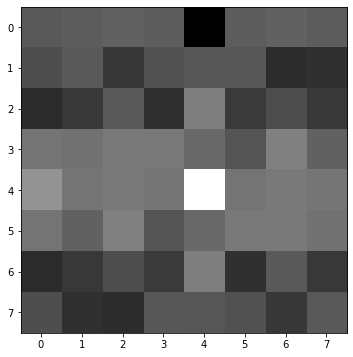

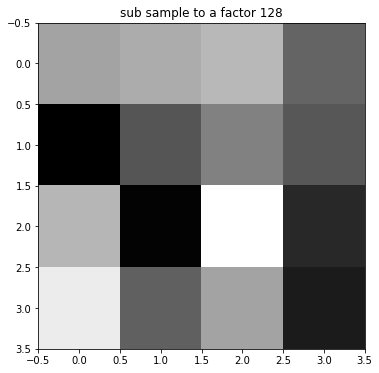

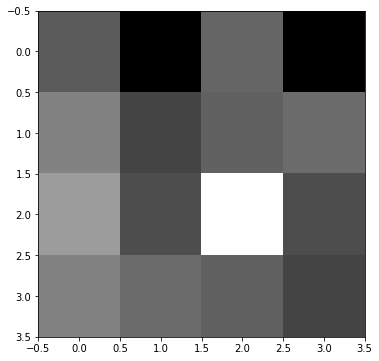

In [25]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
for x in range(0, 8):
    sub = 2**x;
    img = subSample(mandrill,sub)
    imshow(img, f"sub sample to a factor {sub}")
    imshow(toVisualizeLogFT(computeFT(img)))
